# Data Understanding

In this notebook we explore the dataset in order to understand the structure of the data and eventually solving issues we have with the data.

We firstly analyze the file **users.csv** containing data on users and then we move on the file **tweets.csv** that contains data about the tweets.

In [1]:
import re
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

## Users

Here we analyze the file **users.csv** to get information about the users in our dataset.

In [2]:
users = pd.read_csv("../dataset/users.csv", index_col=0)

In [3]:
users.head()

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [4]:
users.shape # Shows the number of rows and the number of columns (not considering the id column)

(11508, 5)

In [5]:
users.info() # Shows the type of the attributes and how many null elements are present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [6]:
users.index.dtype

dtype('int64')

In [7]:
print("Number of different users' indexes", len(set(users.index)))

Number of different users' indexes 11508


### Name

For this attribute we just check if there are some empty fields and we show the entries with the null field.

In [8]:
print("Number of elements whose name field is NaN: ", np.sum(users.name.isna())) # Prints the number of users with a null name field

Number of elements whose name field is NaN:  1


In [9]:
users[users.name.isna()] # Shows the users with a null name

,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


In [10]:
users.loc[users.name.isna(), "name"] = "No Name" # Substitutes the NaN value with the string "No Name"

### Lang
Analyzing this field we check what are the different languages of the users.

In [11]:
print("Number of elements whose lang field is NaN: ", np.sum(users.lang.isna())) # Prints the number of users with a null lang field

Number of elements whose lang field is NaN:  0


In [12]:
users.lang.unique() # All the different languages of the users in the dataset

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [13]:
len(users.lang.unique()) # The number of the different languages of the users in the dataset

26

In [14]:
users.lang.value_counts() # Shows how many users we have for each language

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

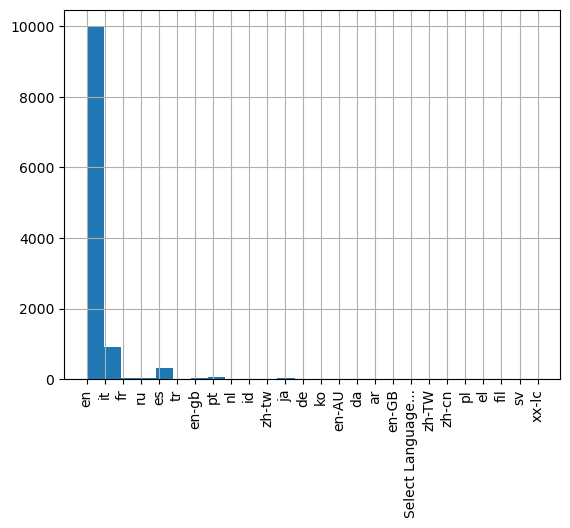

In [15]:
users.lang.hist(bins=26)
plt.xticks(rotation=90)
plt.savefig("../images/data_understanding/users_hist_1.png")
plt.show()

In [16]:
# Remove dialectic specialization
def remove_specialization(sample):
    radix = sample.split("-")[0]
    return radix

users.lang = users.lang.apply(remove_specialization)

print(users.lang.value_counts())

en                    10025
it                      906
es                      319
pt                       65
ru                       42
fr                       36
ja                       33
zh                       21
tr                       14
id                       12
ko                        9
de                        8
nl                        6
ar                        3
da                        2
Select Language...        2
pl                        1
el                        1
fil                       1
sv                        1
xx                        1
Name: lang, dtype: int64


In [17]:
# Changes "Select Language..." to "en" because the text in this field is in English
users.loc[users.lang == "Select Language...", "lang"] = "en"

# Changes "xx" to "en" since we saw that the user has no published tweets, so we decide to assign the most frequent language
users.loc[users.lang == "xx", "lang"] = "en"

In [18]:
print(users.lang.value_counts())

en     10028
it       906
es       319
pt        65
ru        42
fr        36
ja        33
zh        21
tr        14
id        12
ko         9
de         8
nl         6
ar         3
da         2
pl         1
el         1
fil        1
sv         1
Name: lang, dtype: int64


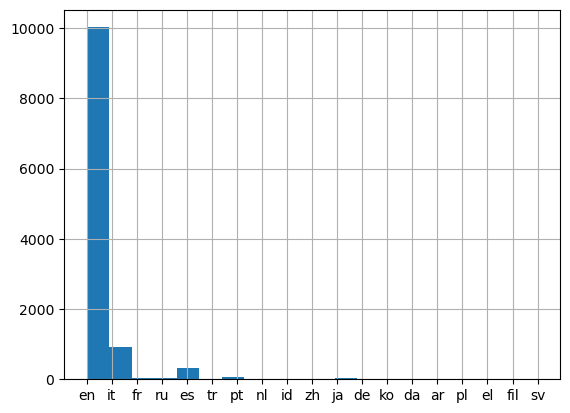

In [19]:
# Histogram of the languages after data cleaning
users.lang.hist(bins=20)
plt.savefig("../images/data_understanding/users_hist_2.png")
plt.show()

### Bot
Bot is a categorical field that is set to 1 if the user is a bot, 0 otherwise. Here we just check if there is any entry with a null field and if there are numbers not contained in the set {0, 1}.

In [20]:
print("Number of elements whose bot field is NaN: ", np.sum(users.bot.isna())) # Prints the number of users with a null bot field

Number of elements whose bot field is NaN:  0


In [21]:
users.bot.unique()

array([1, 0])

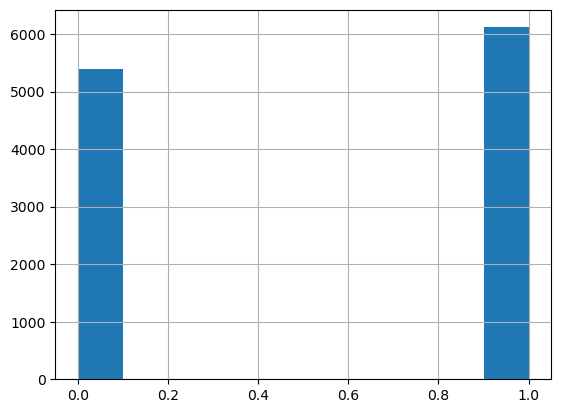

In [22]:
users.bot.hist()
plt.savefig("../images/data_understanding/users_hist_14.png")
plt.show()

In [23]:
users.bot.value_counts() # Shows the values contained in the dataset for the field bot and their occurences

1    6116
0    5392
Name: bot, dtype: int64

### Created_at
Here we analyze the field created_at, that represent the the date of creation of a user account.

In [24]:
# Prints the number of users with a null created_at field
print("Number of NaN created_at: ", np.sum(users.created_at.isna()))

Number of NaN created_at:  0


In [25]:
# Checks if all the dates have the correct format
try:
    pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    print("All the dates are in the correct format")
except ValueError as e:
    print(e)


All the dates are in the correct format


In [26]:
users.created_at.min()

'2012-01-24 01:57:38'

In [27]:
users.created_at.max()

'2020-04-21 07:28:31'

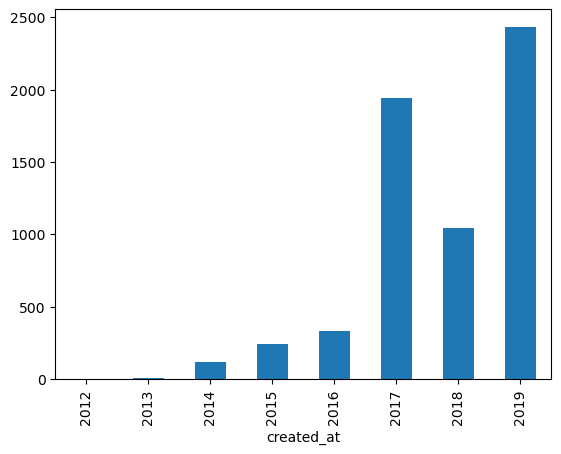

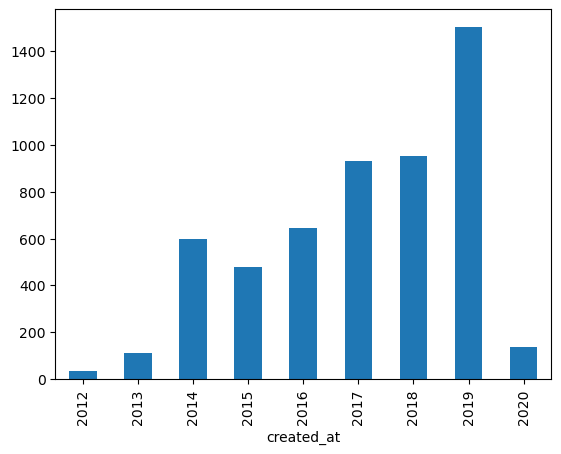

In [28]:
users[users.bot == 1].name.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.savefig("../images/data_understanding/users_hist_3.png")
plt.show()

users[users.bot == 0].name.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.savefig("../images/data_understanding/users_hist_4.png")
plt.show()

### Statuses_count
Here we analyze the field statuses_count that represents the count of the tweets made by the user at the moment of data crawling.

In [29]:
null_statuses_count_ids = users.statuses_count.isna()

# Prints the number of users with a null statuses_count field
print("Number of NaN statuses_counts: ", np.sum(null_statuses_count_ids))

Number of NaN statuses_counts:  399


In [30]:
# Shows statistics on the statuses_count field
users.statuses_count[~null_statuses_count_ids].describe()

count     11109.000000
mean       5883.312359
std       19073.007305
min           0.000000
25%          41.000000
50%          68.000000
75%        2916.000000
max      399555.000000
Name: statuses_count, dtype: float64

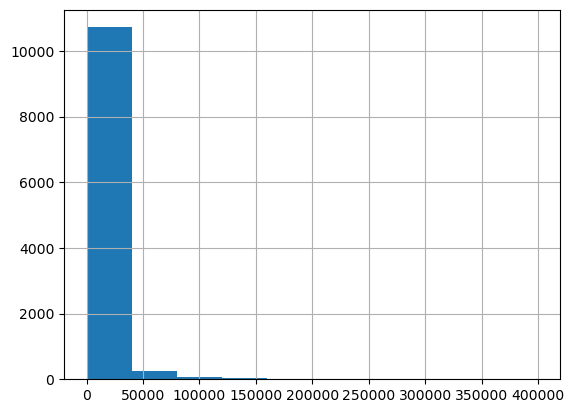

In [31]:
users.statuses_count[~null_statuses_count_ids].hist()
plt.savefig("../images/data_understanding/users_hist_5.png")
plt.show()

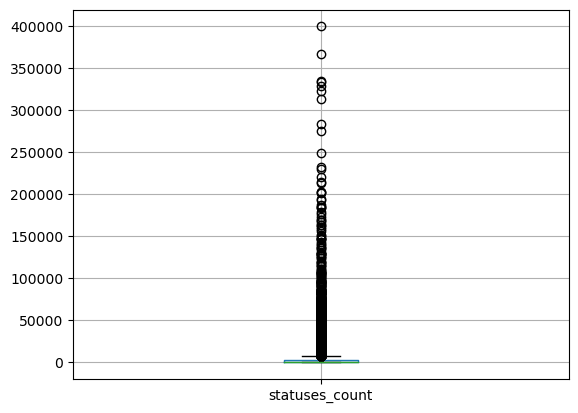

In [32]:
pd.DataFrame(users.statuses_count[~null_statuses_count_ids]).boxplot()
plt.savefig("../images/data_understanding/users_boxplot_1.png")
plt.show()

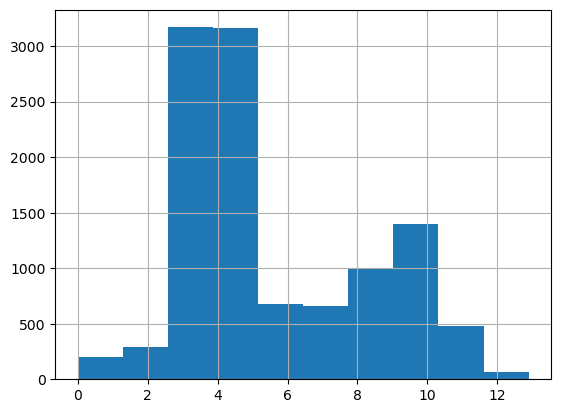

In [33]:
log_feature = pd.Series(np.log(users.statuses_count[~null_statuses_count_ids] + 1))
log_feature.hist()
plt.savefig("../images/data_understanding/users_hist_6.png")
plt.show()

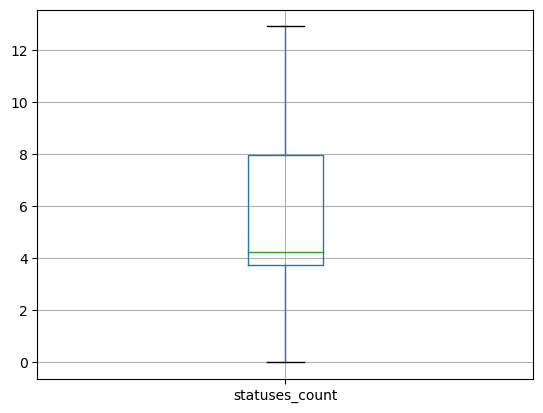

In [34]:
pd.DataFrame(log_feature).boxplot()
plt.savefig("../images/data_understanding/users_boxplot_2.png")
plt.show()

#### Normal users

In the following cells are displayed plots in order to visualize the distribution of values for the normal users (non-bot).

In [35]:
nobot_users = users[users.bot==0] # Users that are not bot

null_statuses_count_nobot_ids = nobot_users.statuses_count.isna()
nobot_users.statuses_count[~null_statuses_count_nobot_ids].describe()

count      4993.000000
mean      11638.219107
std       26719.438432
min           0.000000
25%          61.000000
50%        2041.000000
75%       11585.000000
max      399555.000000
Name: statuses_count, dtype: float64

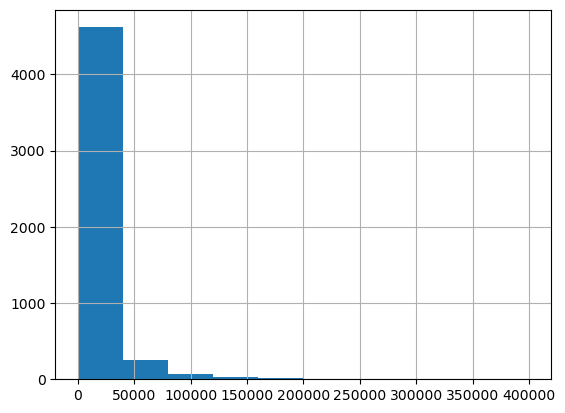

In [36]:
nobot_users.statuses_count[~null_statuses_count_nobot_ids].hist()
plt.savefig("../images/data_understanding/users_hist_7.png")
plt.show()

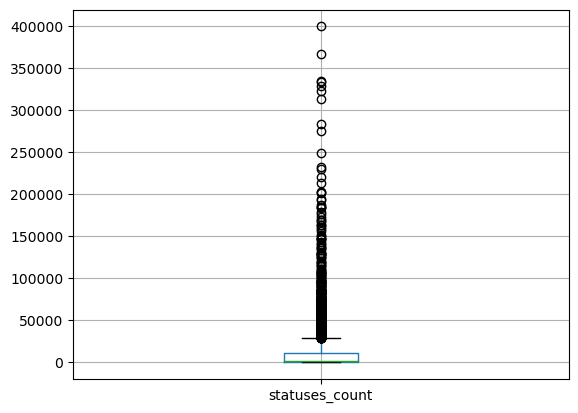

In [37]:
pd.DataFrame(nobot_users.statuses_count[~null_statuses_count_nobot_ids]).boxplot()
plt.savefig("../images/data_understanding/users_boxplot_3.png")
plt.show()

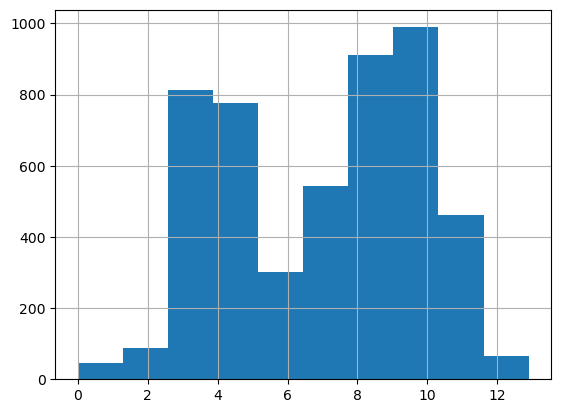

In [38]:
log_feature_nobot = pd.Series(np.log(nobot_users.statuses_count[~null_statuses_count_nobot_ids] + 1))
log_feature_nobot.hist()
plt.savefig("../images/data_understanding/users_hist_8.png")
plt.show()

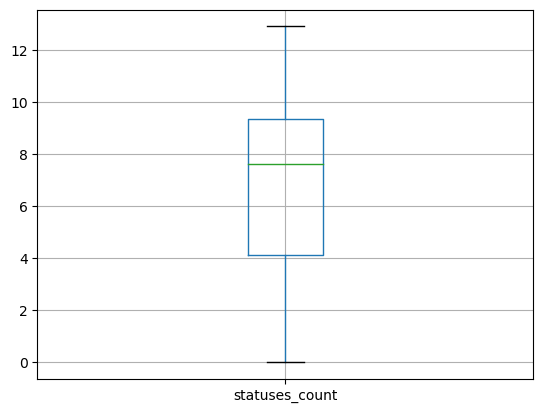

In [39]:
pd.DataFrame(log_feature_nobot).boxplot()
plt.savefig("../images/data_understanding/users_boxplot_4.png")
plt.show()

Number of statuses_count that are NaN for non-bots:  399
count      5392.000000
mean      10928.039132
std       25834.115368
min           0.000000
25%          65.000000
50%        2041.000000
75%       10155.750000
max      399555.000000
Name: statuses_count, dtype: float64


/Users/innocenzofulginiti/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


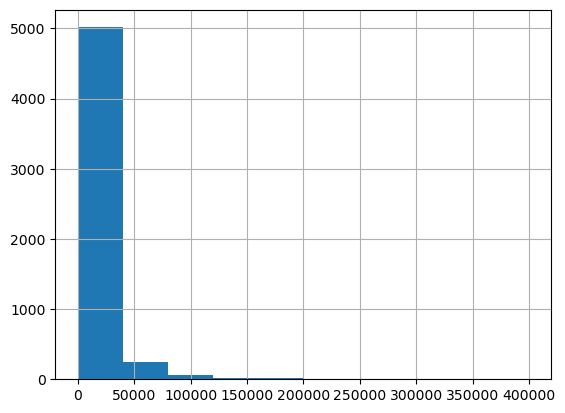

In [40]:
# Remove NaN elements
print("Number of statuses_count that are NaN for non-bots: ", np.sum(null_statuses_count_nobot_ids))

median = np.floor(nobot_users.statuses_count[~null_statuses_count_nobot_ids].median())

nobot_users.loc[null_statuses_count_nobot_ids, "statuses_count"] = median

users.loc[users.bot==0, "statuses_count"] = nobot_users.statuses_count

print(users.loc[users.bot==0, "statuses_count"].describe())

users.loc[users.bot==0, "statuses_count"].hist()
plt.savefig("../images/data_understanding/users_hist_10.png")
plt.show()

#### Bot users
In the following cells are displayed plots in order to visualize the distribution of values for the bots.

In [41]:
bot_users = users[users.bot==1] # Users that are bot

null_statuses_count_bot_ids = bot_users.statuses_count.isna()
bot_users.statuses_count[~null_statuses_count_bot_ids].describe()

count      6116.000000
mean       1185.102845
std        5373.550630
min           0.000000
25%          32.000000
50%          53.000000
75%          78.000000
max      214410.000000
Name: statuses_count, dtype: float64

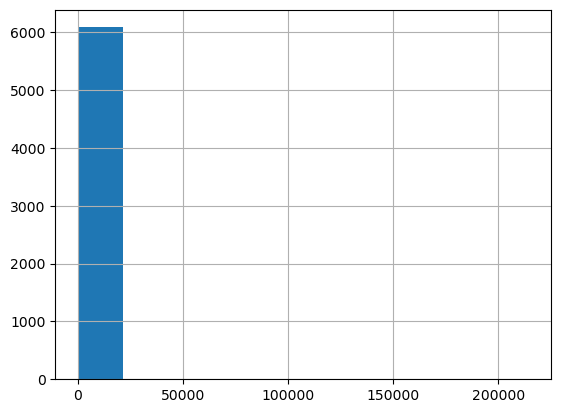

In [42]:
bot_users.statuses_count[~null_statuses_count_bot_ids].hist()
plt.savefig("../images/data_understanding/users_hist_11.png")
plt.show()

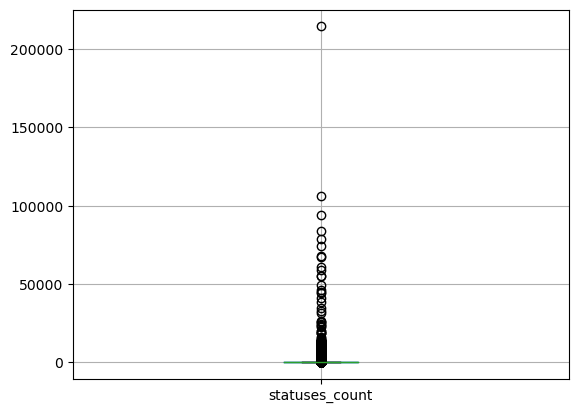

In [43]:
pd.DataFrame(bot_users.statuses_count[~null_statuses_count_bot_ids]).boxplot()
plt.savefig("../images/data_understanding/users_boxplot_5.png")
plt.show()

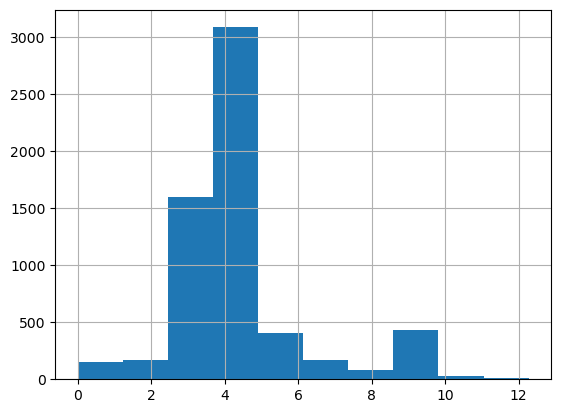

In [44]:
log_feature_bot = pd.Series(np.log(bot_users.statuses_count[~null_statuses_count_bot_ids] + 1))
log_feature_bot.hist()
plt.savefig("../images/data_understanding/users_hist_12.png")
plt.show()

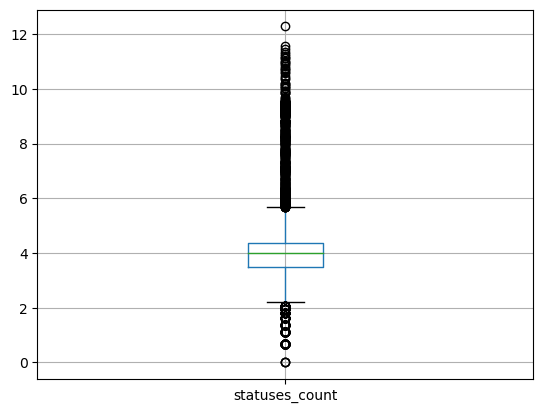

In [45]:
pd.DataFrame(log_feature_bot).boxplot()
plt.savefig("../images/data_understanding/users_boxplot_6.png")
plt.show()
# We can see that there are some outliers

In [46]:
print("Number of statuses_count that are NaN for bots: ", np.sum(null_statuses_count_bot_ids))

Number of statuses_count that are NaN for bots:  0


Now we remove the outliers

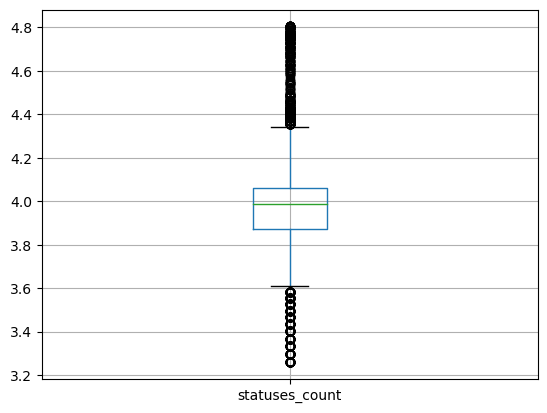

In [47]:
# Removing outliers
outlier_1 = log_feature_bot.quantile(0.80)
outlier_2 = log_feature_bot.quantile(0.20)

log_feature_bot[log_feature_bot > outlier_1] = np.nan
log_feature_bot[log_feature_bot < outlier_2] = np.nan

median = log_feature_bot[~log_feature_bot.isna()].median()
log_feature_bot[log_feature_bot.isna()] = median

pd.DataFrame(log_feature_bot).boxplot()
plt.savefig("../images/data_understanding/users_boxplot_7.png")
plt.show()

count    6116.000000
mean       53.919228
std        14.491231
min        25.000000
25%        47.000000
50%        53.000000
75%        57.000000
max       121.000000
Name: statuses_count, dtype: float64


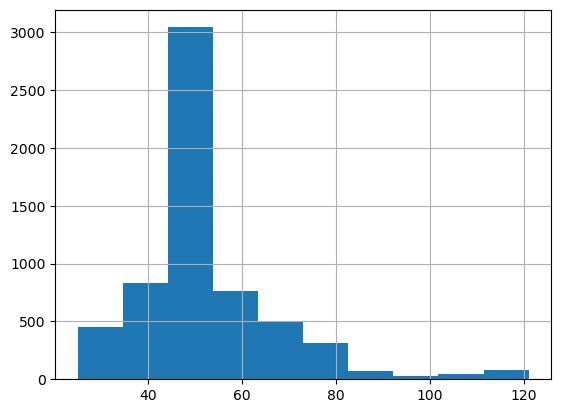

In [48]:
users.loc[users.bot==1, "statuses_count"] = np.exp(log_feature_bot) - 1

print(users.loc[users.bot==1, "statuses_count"].describe())

users.loc[users.bot==1, "statuses_count"].hist()
plt.savefig("../images/data_understanding/users_hist_13.png")
plt.show()

In [49]:
users.statuses_count = users.statuses_count.astype(int)

In [50]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            11508 non-null  object
 1   lang            11508 non-null  object
 2   bot             11508 non-null  int64 
 3   created_at      11508 non-null  object
 4   statuses_count  11508 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 797.5+ KB


## Tweets
Here we analyze the file tweets.csv to get information about the tweets in our dataset.

In [51]:
tweets = pd.read_csv("../dataset/tweets.csv", index_col=0)

In [52]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [53]:
tweets.shape # Shows the number of rows and the number of columns (not considering the id column)

(13664696, 9)

In [54]:
tweets.info() # Shows the type of the attributes and how many null elements are present

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.0+ GB


In [55]:
# We can see the percentage of NaN elements of the columns of the tweets

nan_element = np.sum(tweets.isna()) # Number of NaN elements
total_element = tweets.shape[0] # Total number of elements

print("Number of NaN elements per field:\n", nan_element)
print("Total number of tweets: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the NaN elements per field:\n", ratio_per_column)

print("Mean of the ratio of the NaN elements: ", round(ratio_per_column.mean(), 3))

Number of NaN elements per field:
 user_id            217283
retweet_count      437134
reply_count        647878
favorite_count     647542
num_hashtags      1057524
num_urls           648623
num_mentions       854165
created_at              0
text               537721
dtype: int64
Total number of tweets:  13664696
Ratio of the NaN elements per field:
 user_id           0.015901
retweet_count     0.031990
reply_count       0.047413
favorite_count    0.047388
num_hashtags      0.077391
num_urls          0.047467
num_mentions      0.062509
created_at        0.000000
text              0.039351
dtype: float64
Mean of the ratio of the NaN elements:  0.041


### Index

In [56]:
# See the distribution of the lenght of the index
vlen = np.vectorize(lambda x: len(str(x)))
indexes = pd.Series(vlen(tweets.index.to_numpy()))

In [57]:
indexes.value_counts()
del indexes

In [58]:
# Drop duplicated rows, dropping the rows that have all the values duplicated and not only the id
tweets = tweets.drop_duplicates()

In [59]:
tweets.shape

(11712093, 9)

In [60]:
# Shows all the values of the field index with their occurences
index_value_counts = tweets.index.value_counts()
print(index_value_counts)

dmy                   14
qsa                   12
mxo                   11
nis                   11
rdw                   11
                      ..
472403921332613120     1
583261659797426176     1
361607898599657473     1
582869903788634113     1
486479812614451200     1
Name: id, Length: 11671631, dtype: int64


In [61]:
tweets.loc["dmy"] # Shows all the records with index "dmy"

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
dmy,2882736641,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-24 17:07:08,NaN
dmy,138492664,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-29 13:07:05,NaN
dmy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 01:52:25,NaN
dmy,467136996,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17 06:21:50,NaN
dmy,816485959,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-09 17:24:53,NaN
dmy,531252639,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-08 21:28:02,NaN
dmy,520977237,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-06 01:58:36,NaN
dmy,535901760,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-06 04:07:20,NaN
dmy,2351661655,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07 04:55:39,NaN


In [62]:
# We can see strange entries for non numerical indexes
numerical_indexes_ids = pd.Series(tweets.index.str.isnumeric())

In [63]:
numerical_indexes_ids[numerical_indexes_ids.isna()] = False

In [64]:
# We can see the percentage of NaN elements of the non numerical indexes
nan_element = np.sum(tweets[np.logical_not(numerical_indexes_ids).to_numpy()].isna())
total_element = tweets[np.logical_not(numerical_indexes_ids).to_numpy()].shape[0]

print("Number of NaN tweets with non-numerical ID:\n", nan_element)
print("Total number of tweets with non-numerical ID: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the NaN elements per column:\n", ratio_per_column)
print("Ratio of the NaN elements:", round(ratio_per_column.mean(), 3))

# The percentage of the NaN elements is low, we don't drop those rows

Number of NaN tweets with non-numerical ID:
 user_id            28912
retweet_count      94160
reply_count       151602
favorite_count    151163
num_hashtags      252578
num_urls          151486
num_mentions      203979
created_at             0
text              132770
dtype: int64
Total number of tweets with non-numerical ID:  433860
Ratio of the NaN elements per column:
 user_id           0.066639
retweet_count     0.217029
reply_count       0.349426
favorite_count    0.348414
num_hashtags      0.582165
num_urls          0.349159
num_mentions      0.470149
created_at        0.000000
text              0.306020
dtype: float64
Ratio of the NaN elements: 0.299


In [65]:
# We can see the percentage of NaN elements of the non unique indexes
duplicated_index = index_value_counts[index_value_counts > 1].index.to_numpy()

nan_element = np.sum(tweets.loc[duplicated_index].isna())
total_element = tweets.loc[duplicated_index].shape[0]

print("Number of NaN tweets in the non unique ID:\n", nan_element)
print("Total number of tweets in the non unique ID: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the NaN elements per column:\n", ratio_per_column)

print("Ratio of the NaN elements: ", round(ratio_per_column.mean(), 3))

# The percentage of the NaN elements is very high, we can drop those rows

Number of NaN tweets in the non unique ID:
 user_id            3847
retweet_count     25452
reply_count       38934
favorite_count    38805
num_hashtags      52393
num_urls          38820
num_mentions      47294
created_at            0
text              37501
dtype: int64
Total number of tweets in the non unique ID:  58060
Ratio of the NaN elements per column:
 user_id           0.066259
retweet_count     0.438374
reply_count       0.670582
favorite_count    0.668360
num_hashtags      0.902394
num_urls          0.668619
num_mentions      0.814571
created_at        0.000000
text              0.645901
dtype: float64
Ratio of the NaN elements:  0.542


In [66]:
del numerical_indexes_ids
del index_value_counts

In [67]:
# We remove the tweets with the index duplicated
tweets = tweets.drop(duplicated_index)
del duplicated_index

In [68]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [69]:
# We can see the percentage of NaN elements of the columns of the tweets

nan_element = np.sum(tweets.isna()) # Number of NaN elements
total_element = tweets.shape[0] # Total number of elements

print("Number of NaN elements per field:\n", nan_element)
print("Total number of tweets: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the NaN elements per field:\n", ratio_per_column)

print("Mean of the ratio of the NaN elements: ", round(ratio_per_column.mean(), 3))

Number of NaN elements per field:
 user_id            213429
retweet_count      411682
reply_count        608939
favorite_count     608736
num_hashtags      1005115
num_urls           609791
num_mentions       806855
created_at              0
text               492530
dtype: int64
Total number of tweets:  11654033
Ratio of the NaN elements per field:
 user_id           0.018314
retweet_count     0.035325
reply_count       0.052251
favorite_count    0.052234
num_hashtags      0.086246
num_urls          0.052324
num_mentions      0.069234
created_at        0.000000
text              0.042263
dtype: float64
Mean of the ratio of the NaN elements:  0.045


### User_id

In [70]:
# Shows all the values of the field user_id with their occurencest
tweets.user_id.value_counts()

491630583     3929
497404180     3919
1693274954    3906
157029836     3903
164940888     3903
              ... 
jjxslowggo       1
vagr             1
mvys             1
h7lhx            1
tzn9s6bwj        1
Name: user_id, Length: 218593, dtype: int64

In [71]:
unique_user_id = tweets.user_id.unique()
print(len(unique_user_id)) # Prints how many different user_id we have

218594


In [72]:
numeric_user_id = pd.Series(tweets.user_id.str.isnumeric())
numeric_user_id[numeric_user_id.isna()] = False

In [73]:
print(f"Numerical ID's {np.sum(numeric_user_id)}") # Prints how many numeric user_id we have

Numerical ID's 11227784


In [74]:
tweets = tweets[numeric_user_id]

del numeric_user_id
del unique_user_id

In [75]:
# Removes tweets whose user is not in the users dataset
numeric_user_id = pd.to_numeric(tweets.user_id, errors="coerce")
tweets = tweets[numeric_user_id.isin(users.index)]

In [76]:
tweets.shape

(11226977, 9)

In [77]:
# Function to handle non negative numerical values and outliers

def function_handle_nnn(feature_name = None, upperscale_bound=1e7, quantile_outlier=0.9):
    """
    Function that handles the numerical features of the tweets dataset,
    takes out the correct numerical value w.r.t. the semantic of the features,
    removes the outlier using the quantile outlier passed as parameter.
    Args:
        - feature_name: the name of the feature to handle.
        - upperscal_bound: the maximal number admissible for that feature.
        - quantile_outlier: the quantile over which the points are signed as outliers.
    """
    print(f"Feature: {feature_name}")
    
    # valid numbers
    # take only the numbers not the alphanumerical one, using the numerical_entries mask
    numerical_entries = pd.Series(tweets[feature_name].str.isnumeric())
    numerical_entries[numerical_entries.isna()] = False
    
    numerical_entries = numerical_entries.astype(bool)
    
    # cast the feature to a number
    numeric_count = pd.to_numeric(tweets[feature_name], errors="coerce")

    # remove the inf elements
    numeric_count.replace(float("inf"), np.nan, inplace=True)
    # remove the negative elements
    numeric_count = numeric_count.apply(lambda x: x if x >= 0 else np.nan)
    # remove the alphanumerical elements
    numeric_count[~numerical_entries] = np.nan

    # remove float elements
    numeric_count_rounds = numeric_count.round()
    numeric_count[numeric_count_rounds == numeric_count] = numeric_count_rounds[numeric_count_rounds == numeric_count].astype(int)
    numeric_count[numeric_count_rounds != numeric_count] = np.nan
    
    tweets[feature_name] = numeric_count

    del numeric_count_rounds
    del numeric_count
        
    # remove over upper bound numbers
    tweets.loc[tweets[feature_name]>upperscale_bound, feature_name] = np.nan # np.floor(np.nanmedian(tweets[feature_name])) # upperscale_bound
    
    # transform powerlaw distr with log(x + 1)
    log_transformed = tweets[feature_name].apply(lambda x: np.log(x + 1))
    
    # print statistics
    print("Histogram - with outliers:")
    tweets[feature_name].hist()
    plt.savefig(f"../images/data_understanding/tweets_{feature_name}_hist_1.png")
    plt.show()
    
    print("box plot - with outliers:")
    pd.DataFrame(tweets[feature_name]).boxplot()
    plt.savefig(f"../images/data_understanding/tweets_{feature_name}_boxplot_1.png")
    plt.show()
    
    print("Histogram log - with outliers:")
    log_transformed.hist()
    plt.savefig(f"../images/data_understanding/tweets_{feature_name}_hist_2.png")
    plt.show()
    
    print("box plot log - with outliers:")
    pd.DataFrame(log_transformed).boxplot()
    plt.savefig(f"../images/data_understanding/tweets_{feature_name}_boxplot_2.png")
    plt.show()

    # remove outliers
    quantile = log_transformed[~log_transformed.isna()].quantile(quantile_outlier)   
    print(f"{quantile_outlier}-quantile log : ", quantile)
    print(f"{quantile_outlier}-quantile : ", np.exp(quantile) - 1)
    log_transformed[log_transformed>quantile] = np.nan
    
    tweets[feature_name] = log_transformed.apply(lambda x: np.exp(x) - 1)

    # remove the NaN elements, by compute the overall median of the feature

    # na_ids_count = tweets[feature_name].isna()
    
    # median = tweets.loc[~na_ids_count, feature_name].median()
    # tweets.loc[na_ids_count, feature_name] = median

    # del na_ids_count

    # remove the NaN elements, by compute the median conditioned by the user_id of the tweet
    tweets[feature_name].fillna(tweets.groupby(["user_id"])[feature_name].transform(lambda x: np.floor(np.nanmedian(x))), inplace=True)

    tweets.loc[tweets[feature_name].isna(), feature_name] = np.floor(np.nanmedian(tweets[feature_name]))
    
    tweets[feature_name] = tweets[feature_name].astype(int)

    # recreate log scale feature after removed the outliers, this can be optimize i think
    log_transformed = tweets[feature_name].apply(lambda x: np.log(x + 1))

    # print statistics
    print("Histogram - removed outliers:")
    tweets[feature_name].hist()
    plt.savefig(f"../images/data_understanding/tweets_{feature_name}_hist_3.png")
    plt.show()
    
    print("box plot - removed outliers:")
    pd.DataFrame(tweets[feature_name]).boxplot()
    plt.savefig(f"../images/data_understanding/tweets_{feature_name}_boxplot_3.png")
    plt.show()
    
    print("Histogram log - removed outliers:")
    log_transformed.hist()
    plt.savefig(f"../images/data_understanding/tweets_{feature_name}_hist_4.png")
    plt.show()
    
    print("box plot log - removed outliers:")
    pd.DataFrame(log_transformed).boxplot()
    plt.savefig(f"../images/data_understanding/tweets_{feature_name}_boxplot_4.png")
    plt.show()

    print("Finished", end="\n")
    
    del log_transformed
    
    value_counts = tweets[feature_name].value_counts()
    print("Value counts:")
    print(value_counts, end="\n")
    print(f"Max value {tweets[feature_name].max()}")

### Retweet_count

Feature: retweet_count
Histogram - with outliers:


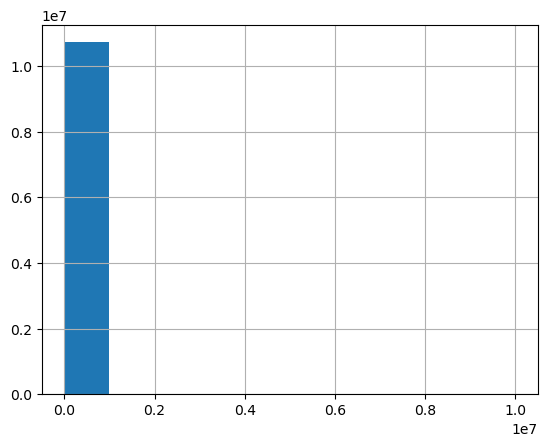

box plot - with outliers:


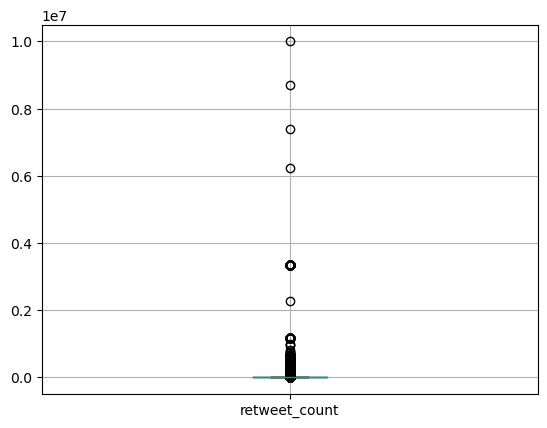

Histogram log - with outliers:


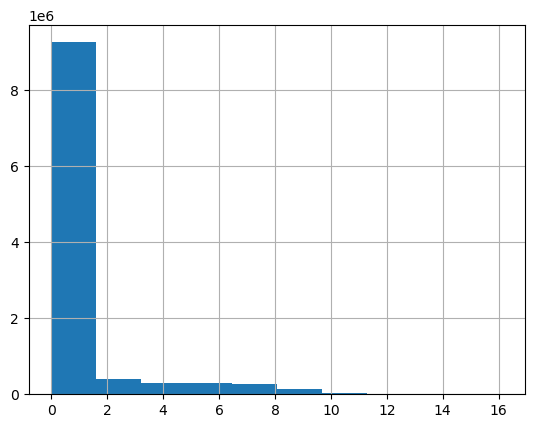

box plot log - with outliers:


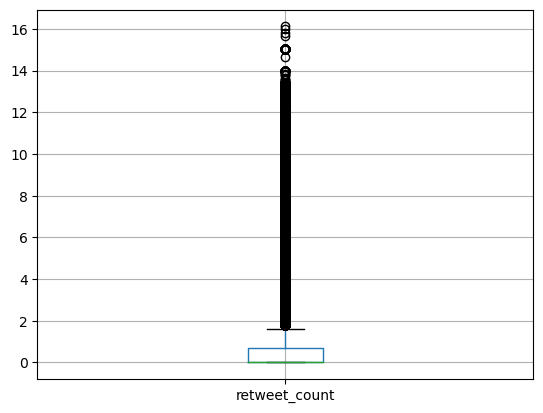

0.995-quantile log :  9.76927021041632
0.995-quantile :  17486.999999999996
Histogram - removed outliers:


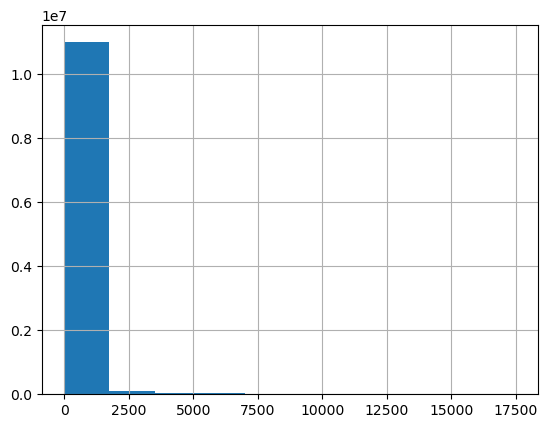

box plot - removed outliers:


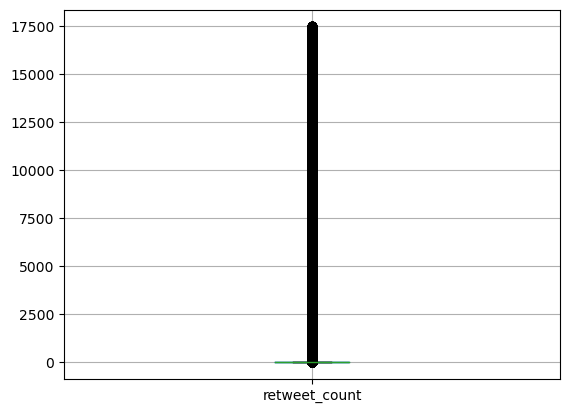

Histogram log - removed outliers:


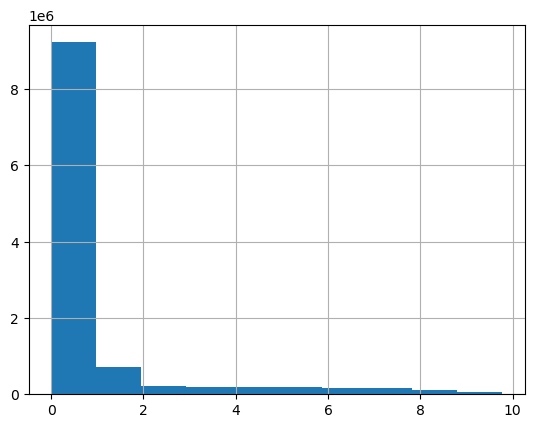

box plot log - removed outliers:


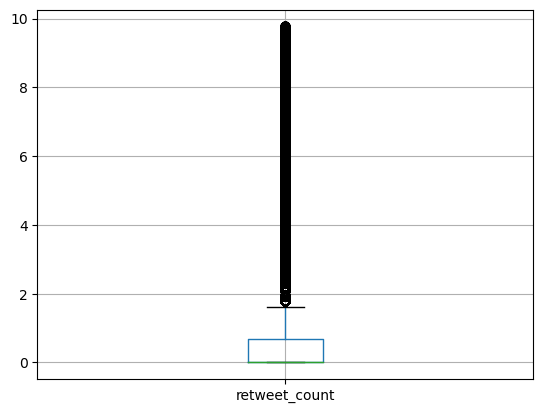

Finished
Value counts:
0        8189953
1        1028645
2         304571
3         248720
5         116790
          ...   
12820          1
11175          1
12060          1
17270          1
11977          1
Name: retweet_count, Length: 12814, dtype: int64
Max value 17486


In [78]:
function_handle_nnn("retweet_count", quantile_outlier=0.995)

### Reply_count

Feature: reply_count
Histogram - with outliers:


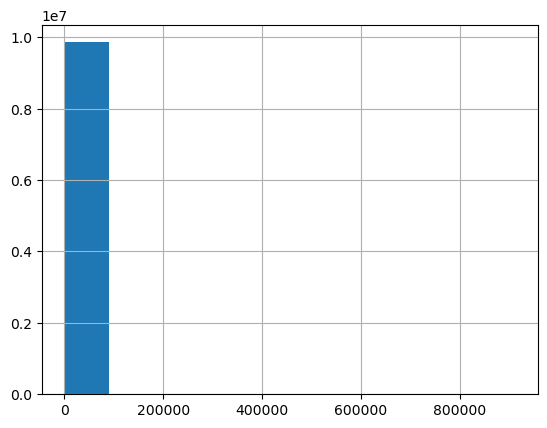

box plot - with outliers:


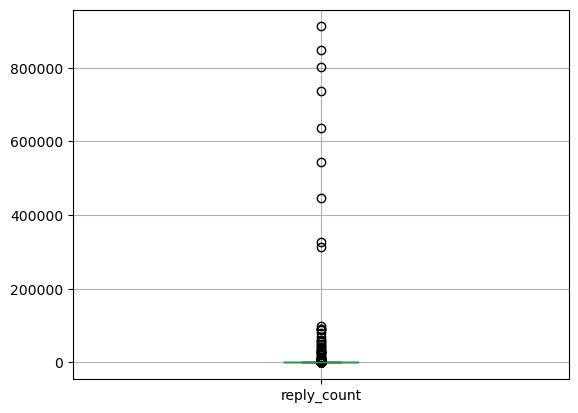

Histogram log - with outliers:


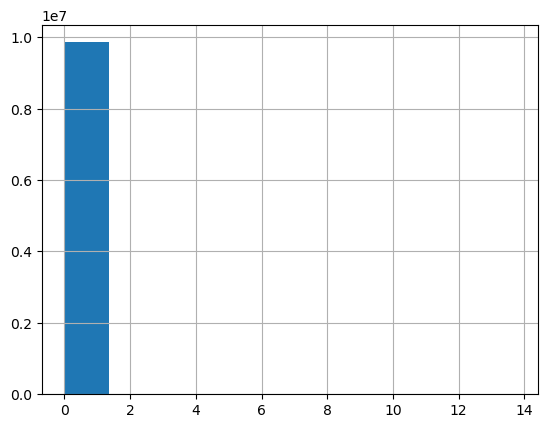

box plot log - with outliers:


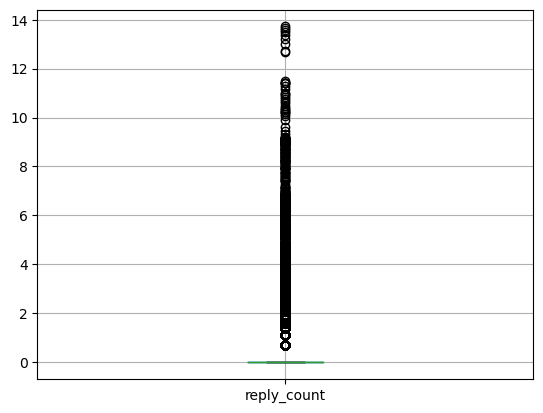

0.99995-quantile log :  5.464236668209483
0.99995-quantile :  235.09556705587985
Histogram - removed outliers:


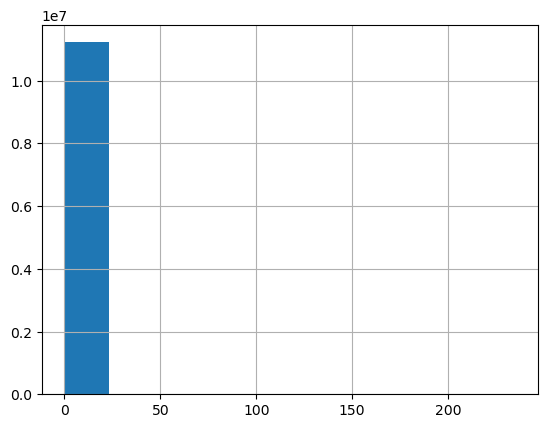

box plot - removed outliers:


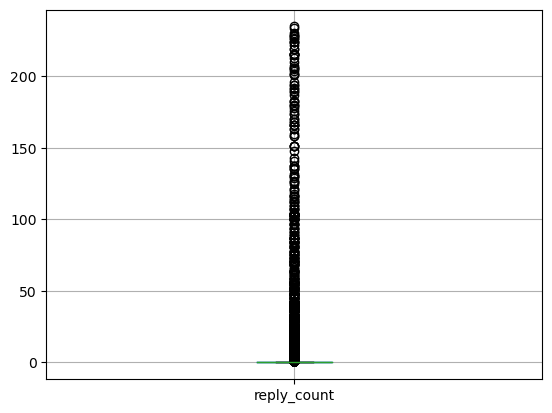

Histogram log - removed outliers:


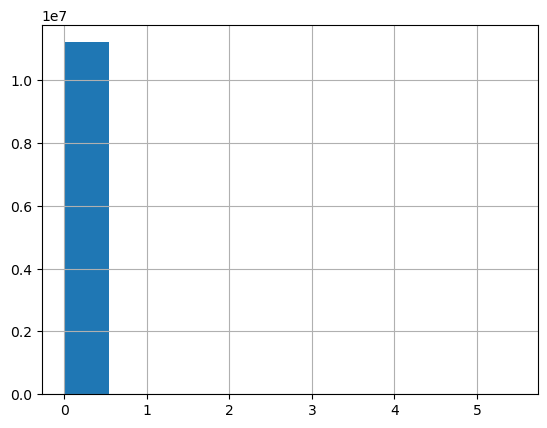

box plot log - removed outliers:


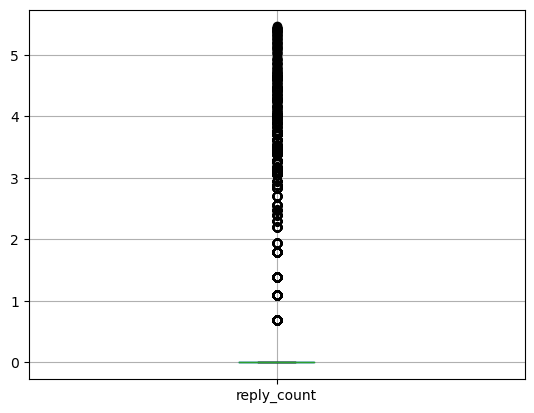

Finished
Value counts:
0      11210353
1         13188
2          1208
3           631
5           284
         ...   
110           1
99            1
143           1
127           1
178           1
Name: reply_count, Length: 144, dtype: int64
Max value 235


In [79]:
function_handle_nnn("reply_count", 1e6, quantile_outlier=0.99995)

### Favorite_count

Feature: favorite_count
Histogram - with outliers:


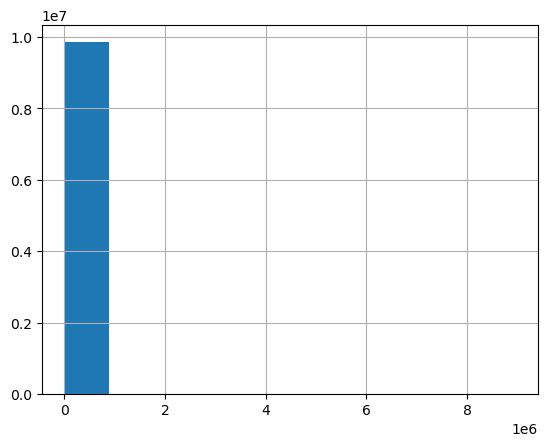

box plot - with outliers:


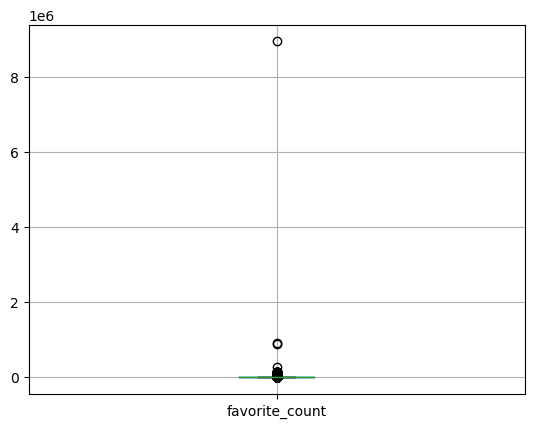

Histogram log - with outliers:


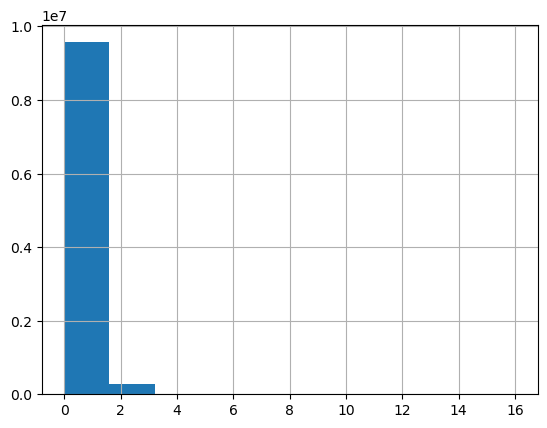

box plot log - with outliers:


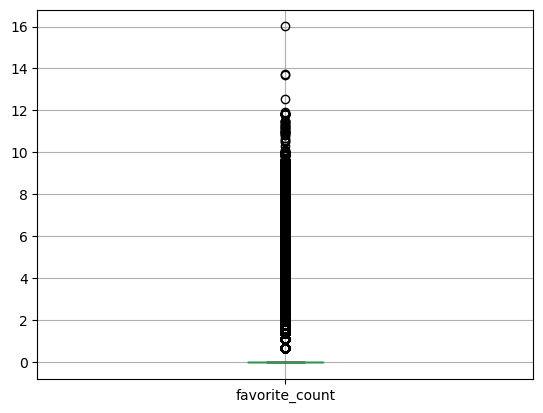

0.999-quantile log :  3.871201010907891
0.999-quantile :  47.00000000000001
Histogram - removed outliers:


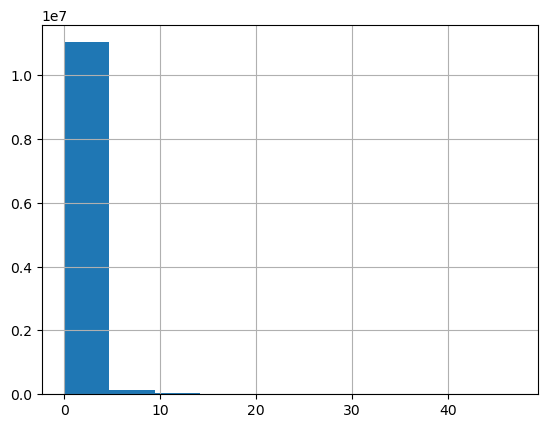

box plot - removed outliers:


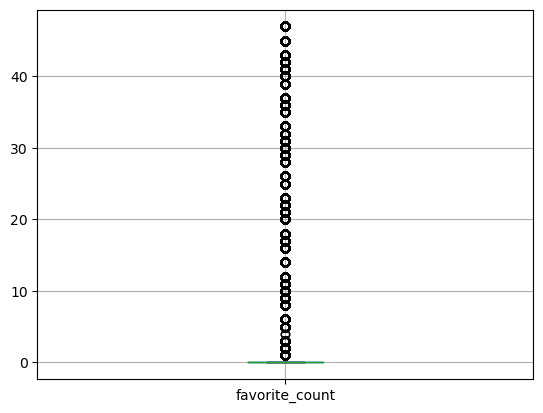

Histogram log - removed outliers:


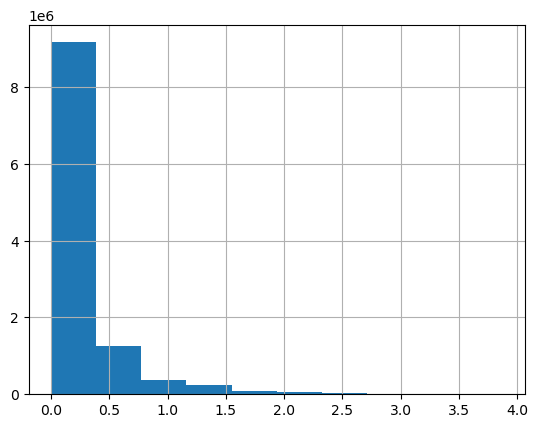

box plot log - removed outliers:


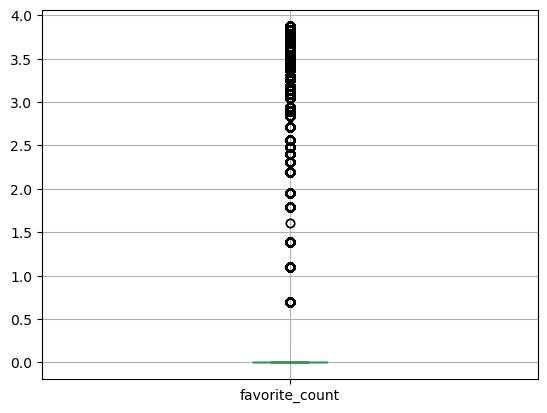

Finished
Value counts:
0     9157681
1     1257025
2      367264
3      244187
5       87097
6       22821
8       16242
9       11997
12      10508
10       8944
14       7907
11       7131
16       4908
32       2887
23       2117
22       2116
17       1953
18       1682
26       1612
20       1447
21       1408
33        913
25        839
36        813
28        677
29        663
30        587
42        523
31        514
45        472
35        410
39        324
37        310
40        299
41        270
43        230
47        197
4           2
Name: favorite_count, dtype: int64
Max value 47


In [80]:
function_handle_nnn("favorite_count", quantile_outlier=0.999)

### Num_hashtags

Feature: num_hashtags
Histogram - with outliers:


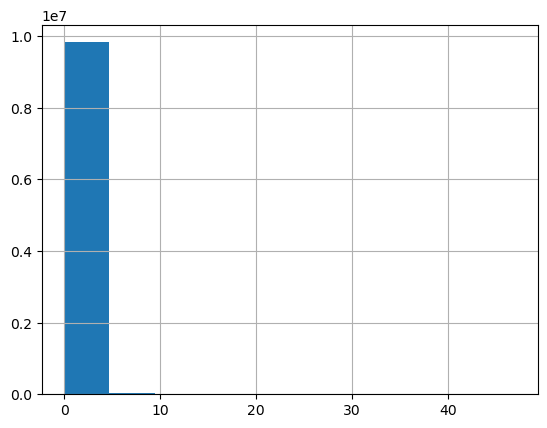

box plot - with outliers:


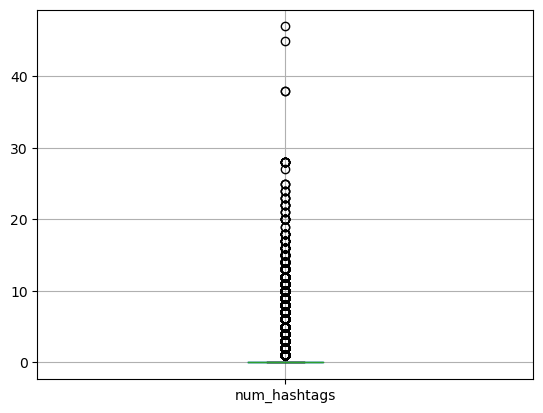

Histogram log - with outliers:


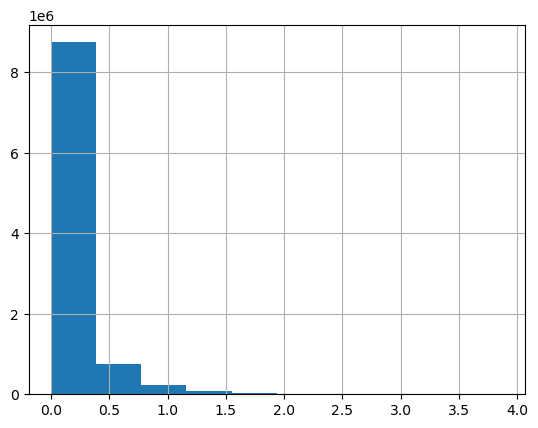

box plot log - with outliers:


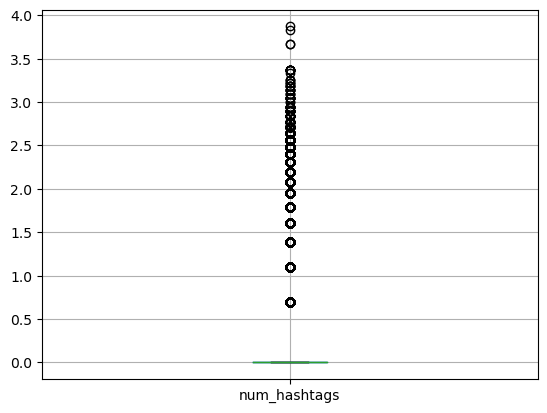

0.9999-quantile log :  2.3978952727983707
0.9999-quantile :  10.000000000000002
Histogram - removed outliers:


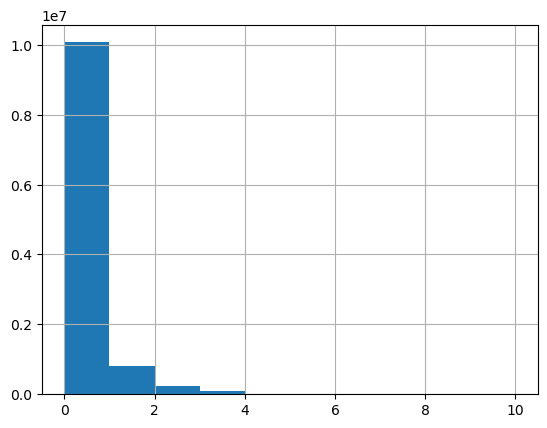

box plot - removed outliers:


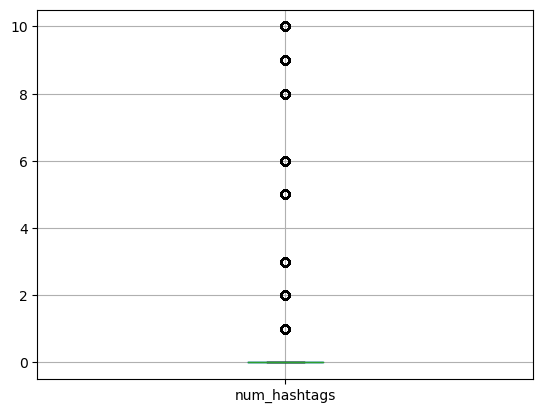

Histogram log - removed outliers:


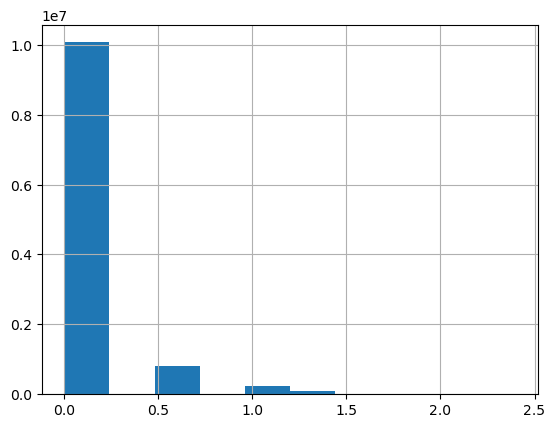

box plot log - removed outliers:


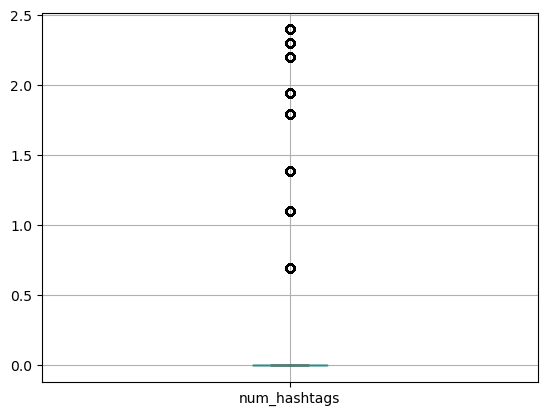

Finished
Value counts:
0     10069020
1       794725
2       231029
3       101663
5        21395
6         4351
8         2328
9         1580
10         886
Name: num_hashtags, dtype: int64
Max value 10


In [81]:
function_handle_nnn("num_hashtags", 50, quantile_outlier=0.9999)

### Num_urls

Feature: num_urls
Histogram - with outliers:


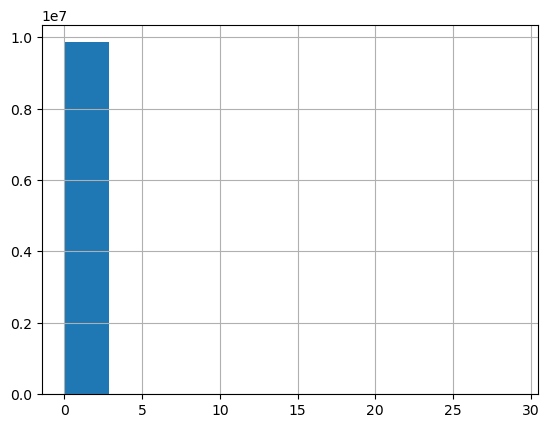

box plot - with outliers:


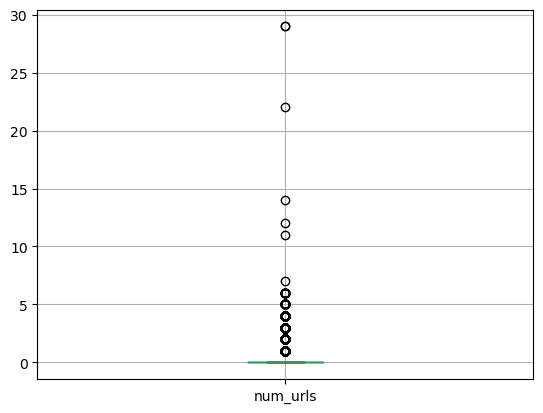

Histogram log - with outliers:


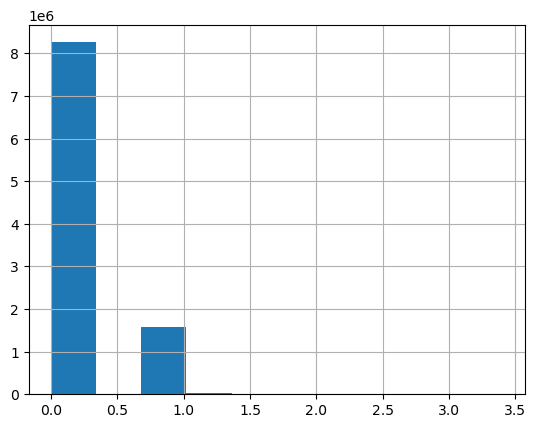

box plot log - with outliers:


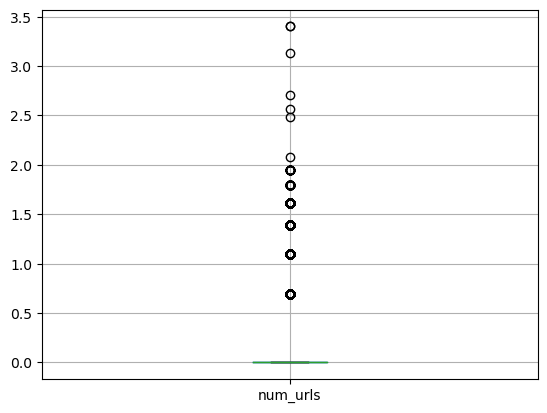

0.999995-quantile log :  1.791759469228055
0.999995-quantile :  5.0
Histogram - removed outliers:


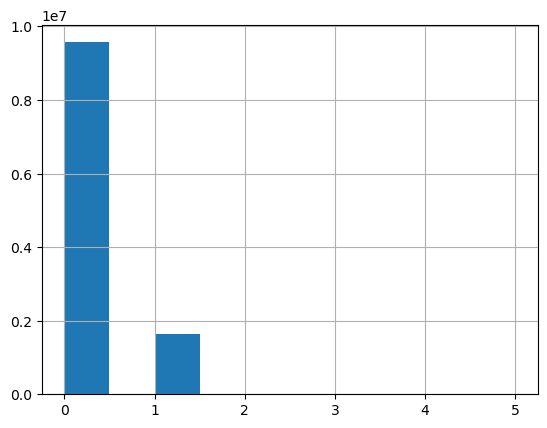

box plot - removed outliers:


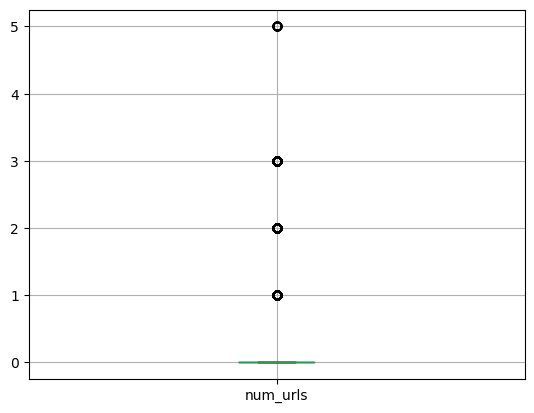

Histogram log - removed outliers:


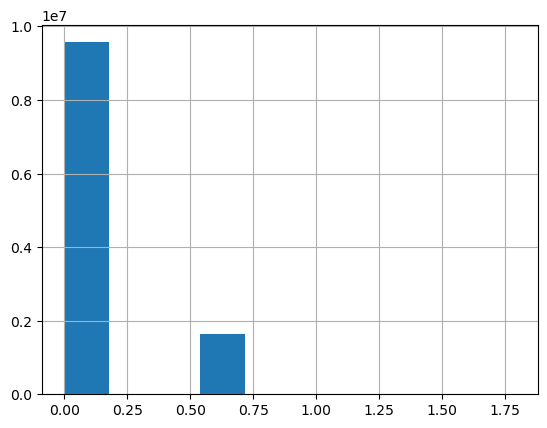

box plot log - removed outliers:


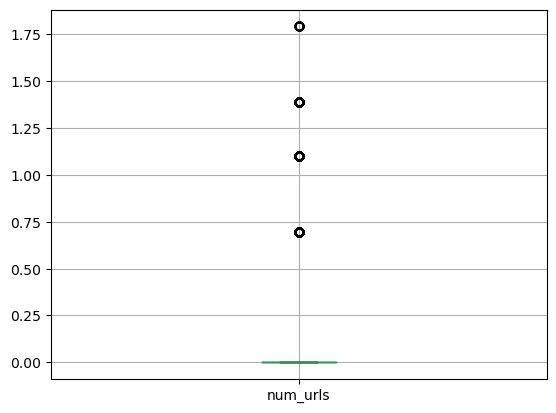

Finished
Value counts:
0    9568609
1    1637184
2      20095
3       1037
5         52
Name: num_urls, dtype: int64
Max value 5


In [82]:
function_handle_nnn("num_urls", 30, quantile_outlier=0.999995)

### Num_mentions

Feature: num_mentions
Histogram - with outliers:


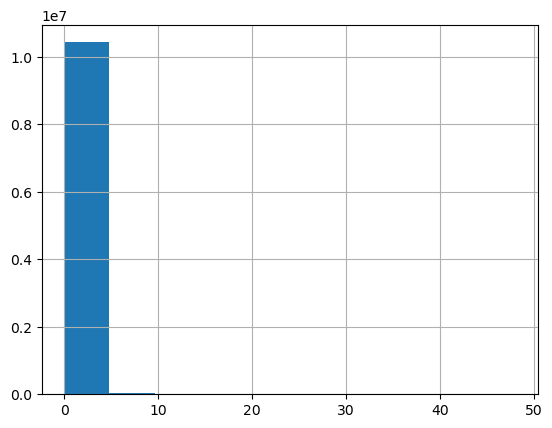

box plot - with outliers:


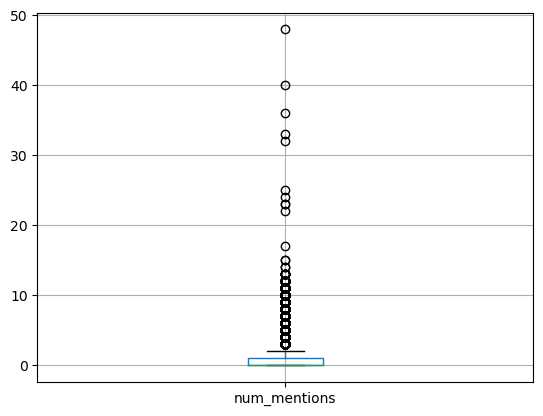

Histogram log - with outliers:


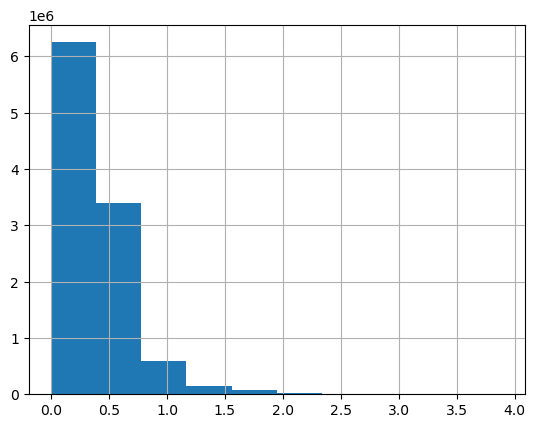

box plot log - with outliers:


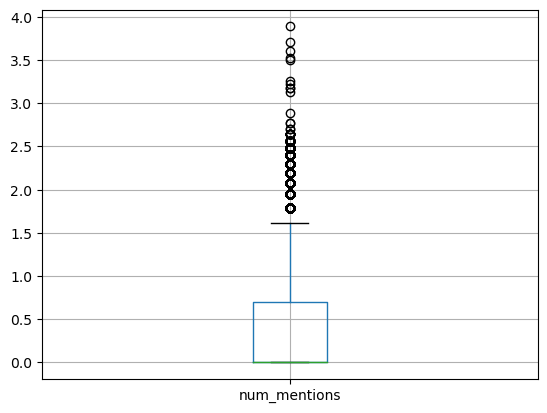

0.99995-quantile log :  2.4849066497880004
0.99995-quantile :  11.0
Histogram - removed outliers:


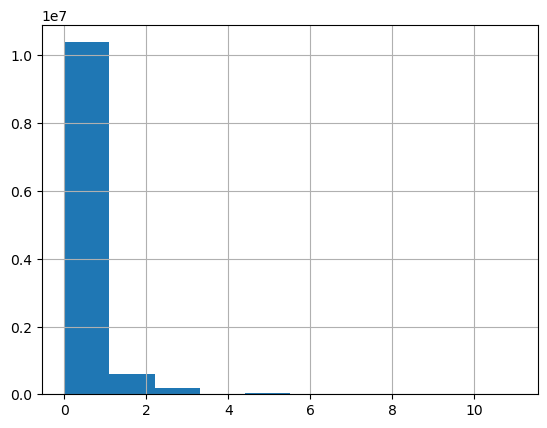

box plot - removed outliers:


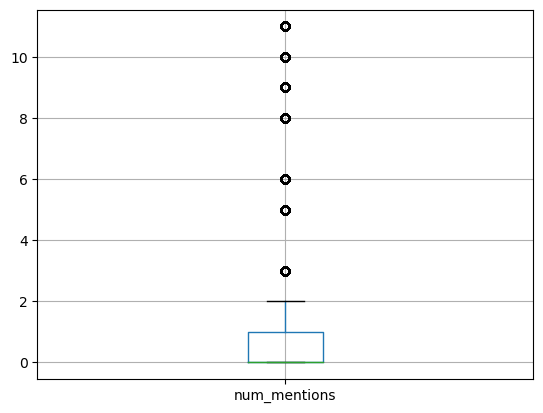

Histogram log - removed outliers:


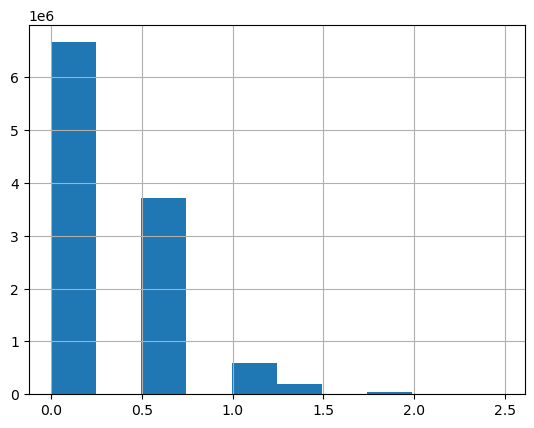

box plot log - removed outliers:


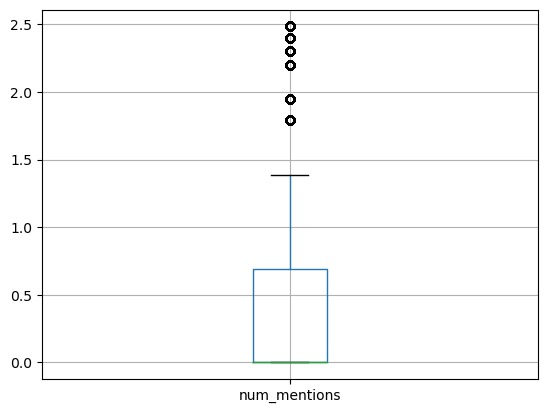

Finished
Value counts:
0     6663959
1     3724909
2      598135
3      191114
5       32722
6        6632
8        4452
9        2801
10       1653
11        600
Name: num_mentions, dtype: int64
Max value 11


In [83]:
function_handle_nnn("num_mentions", 50, quantile_outlier=0.99995)

## Numerical correlations

Correlations among numerical data.

In [84]:
numerical_cols = ["retweet_count", "reply_count", "favorite_count", "num_hashtags", "num_urls", "num_mentions"]

In [85]:
tweets[numerical_cols].sample(10000).corr()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
retweet_count,1.000000,0.033507,-0.032575,0.016336,-0.009635,0.108838
reply_count,0.033507,1.000000,0.012326,-0.003634,-0.009341,0.010958
favorite_count,-0.032575,0.012326,1.000000,-0.003113,-0.060656,-0.055566
num_hashtags,0.016336,-0.003634,-0.003113,1.000000,0.103525,0.091328
num_urls,-0.009635,-0.009341,-0.060656,0.103525,1.000000,-0.040421
num_mentions,0.108838,0.010958,-0.055566,0.091328,-0.040421,1.000000


### Created_at

In [86]:
nan_created_at_ids = tweets.created_at.isna()
# Prints the number of tweets with a null created_at field
print("Number of NaN in created_at feature: ", np.sum(nan_created_at_ids))


tweets = tweets[~nan_created_at_ids]

Number of NaN in created_at feature:  0


In [87]:
# Checks if all the dates have the correct format
try:
    dates = pd.to_datetime(tweets.created_at, format='%Y-%m-%d %H:%M:%S', errors='raise')
    print("All the dates are ok!")
except ValueError as e:
    print(e)

All the dates are ok!


In [88]:
tweets.created_at.dtype

dtype('O')

In [89]:
# Prints the oldest date of a tweet in the dataset
tweets.created_at.min()

# We notice that this date is wrong, because it's older than the date of creation of Twitter

'1953-04-17 12:24:33'

In [90]:
# Shows the most recent date of a tweet in the dataset
tweets.created_at.max()

# We notice that this date is wrong, because it is in the future

'2040-04-27 11:03:25'

In [91]:
# Replaces the wrong dates with a default one
default_date = "1800-01-01 00:00:00"

In [92]:
tweets.user_id = tweets.user_id.astype(int)

users["user_id"] = users.index

# Executes a join by user_id for the created_at of tweets and created_at of users
joined = tweets[["user_id", "created_at"]].join(other=users[["user_id", "created_at"]], on="user_id", how="left", lsuffix='_tweet', rsuffix='_user').loc[:, ["created_at_tweet", "created_at_user"]]

del users["user_id"]

In [93]:
joined.shape

(11226977, 2)

In [94]:
joined.head()

,created_at_tweet,created_at_user
id,,
509354017856950272,2019-09-11 14:53:55,2016-07-03 02:37:46
583002592529121280,2020-04-01 20:27:04,2016-07-13 00:06:28
461498835362013185,2019-05-02 13:34:31,2019-03-11 03:36:43
528808127366692864,2019-11-04 07:17:37,2017-01-18 05:40:50
575336690904006656,2020-03-11 16:45:31,2018-04-17 22:50:24


In [95]:
# If the date of a tweet is older than the date of creation of the user who published the tweet, then is considered wrong
wrong_datas = joined.created_at_tweet < joined.created_at_user

joined.loc[wrong_datas, "created_at_tweet"] = default_date

In [96]:
tweets.loc[:, "created_at"] = joined.loc[:, "created_at_tweet"]

In [97]:
del joined

In [98]:
# Changes future dates with '2022-01-01 00:00:00'
newest = pd.to_datetime("2022-01-01 00:00:00", format='%Y-%m-%d %H:%M:%S')

tweets.loc[dates>newest, "created_at"] = default_date

del dates

In [99]:
tweets.created_at.min()

'1800-01-01 00:00:00'

In [100]:
tweets.created_at.max()

'2020-05-03 10:36:12'

## Text

In [101]:
# Prints the number of tweets with a null text field
nan_text_ids = tweets.text.isna()
print("Number of number of NaN tweets: ", np.sum(nan_text_ids))

Number of number of NaN tweets:  384406


In [102]:
# Replaces the NaN tweets with the empty string
tweets.loc[nan_text_ids, "text"] = ""

In [103]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11226977 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   retweet_count   int64 
 2   reply_count     int64 
 3   favorite_count  int64 
 4   num_hashtags    int64 
 5   num_urls        int64 
 6   num_mentions    int64 
 7   created_at      object
 8   text            object
dtypes: int64(7), object(2)
memory usage: 856.6+ MB


In [104]:
tweets.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.122698e+07,1.122698e+07,1.122698e+07,1.122698e+07,1.122698e+07,1.122698e+07,1.122698e+07
mean,8.316809e+08,1.429997e+02,6.021746e-03,4.137453e-01,1.546772e-01,1.497059e-01,5.149987e-01
std,8.530063e+08,9.471781e+02,6.358245e-01,1.697781e+00,5.521114e-01,3.626578e-01,7.705696e-01
min,6.780330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.328048e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.680803e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.232535e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,3.164942e+09,1.748600e+04,2.350000e+02,4.700000e+01,1.000000e+01,5.000000e+00,1.100000e+01


# Save to file

In [105]:
users.to_csv("cleaned_users.csv")

In [106]:
tweets.to_csv("cleaned_tweets.csv")